In [7]:
using Revise
includet("../scripts/ned_ca_jaimesstats.jl")
using GLMakie
using CairoMakie

# Build/load the df

In [9]:
df = make_jaimesstats_df(3:10)
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,code,75.3636,0,55.0,232,0,Int64
2,N,6.5,3,6.5,10,0,Int64
3,numstates,255.0,8,96.0,1024,0,Int64
4,phi,0.382567,0.000976562,0.15625,1.0,0,Float64
5,Nac,12.3821,1,2.0,1024,0,Int64
6,Nsingle,10.8026,0,1.5,1024,0,Int64
7,Neq,1.34943,0,0.0,156,0,Int64
8,Nneq,0.230114,0,0.0,4,0,Int64
9,Neqcyc,0.147727,0,0.0,15,0,Int64


# Exploratory plots

In [211]:
# make a selection of the df that is then plotted below
sdf =  df[2 .<= ca_numenzymes.(df.code) .<= 4,:];

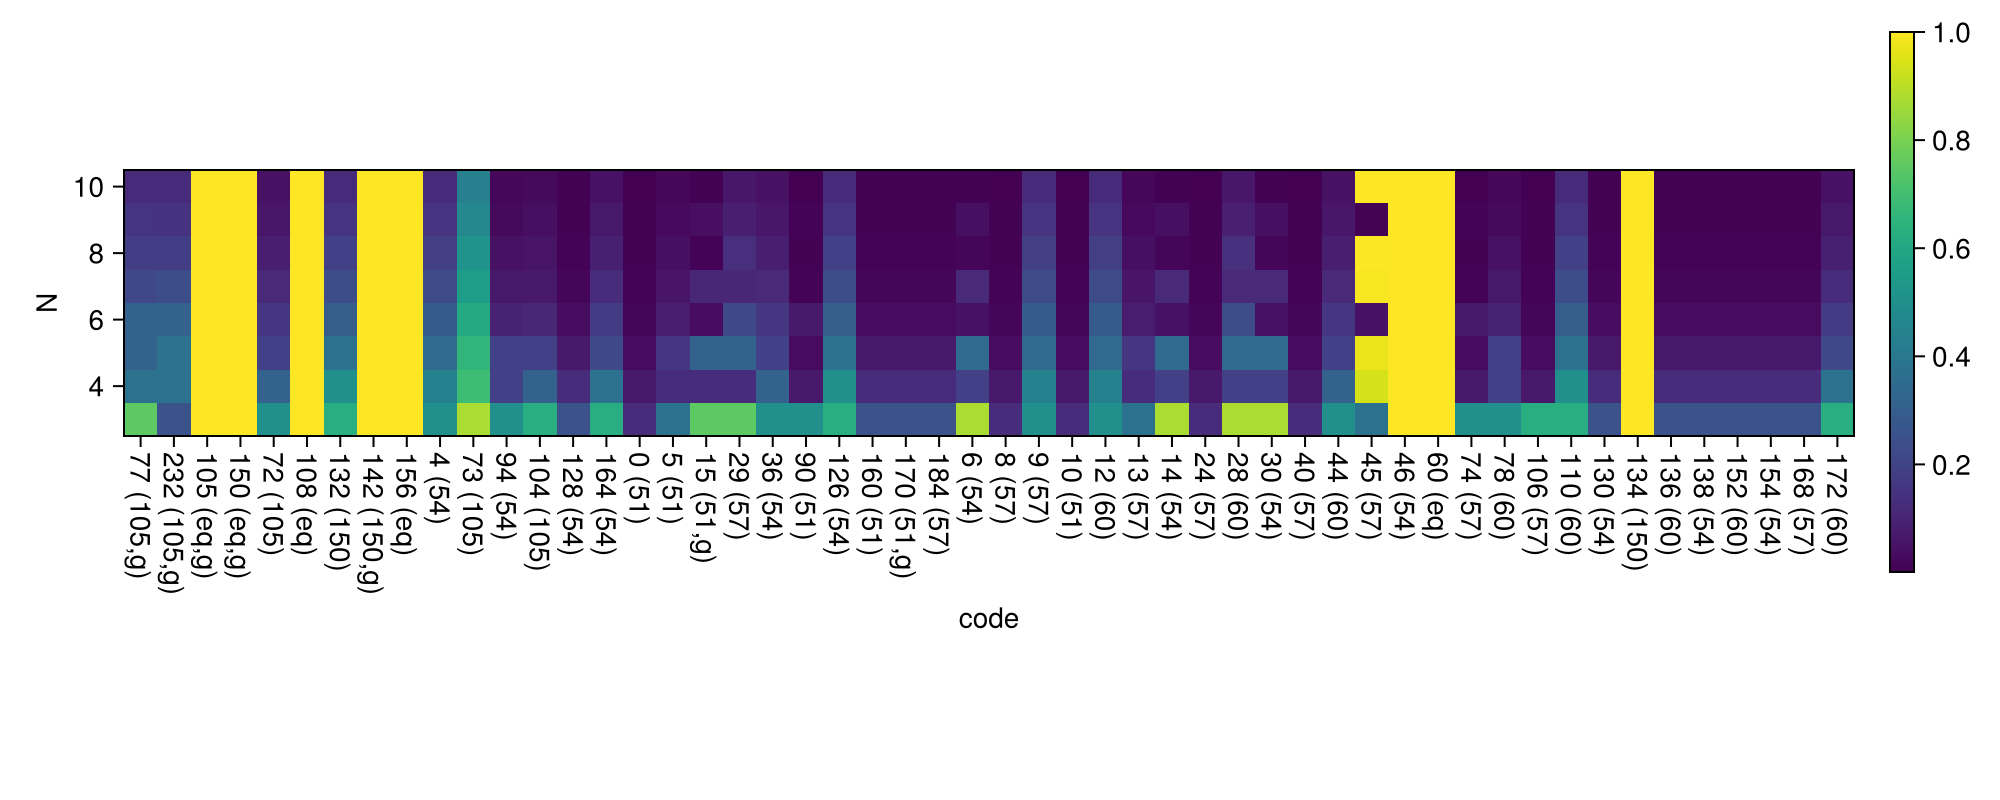

In [224]:
codes = unique(sdf.code)
code_i = map(c->findfirst(x->x==c, codes), sdf.code)

fig = Figure(size=(1000, 400))
ax = Axis(fig[1,1], aspect=DataAspect())

# plot = scatter!(ax, code_i, sdf.N; color=sdf.phi, marker=:rect, markersize=20)
plot = heatmap!(ax, code_i, sdf.N, sdf.phi)
Colorbar(fig[1,2], plot)

ax.ylabel = "N"
ax.xlabel = "code"
ax.xticks = (1:length(codes), full_code_label.(codes; short=true))
ax.xticklabelrotation = -pi/2

fig

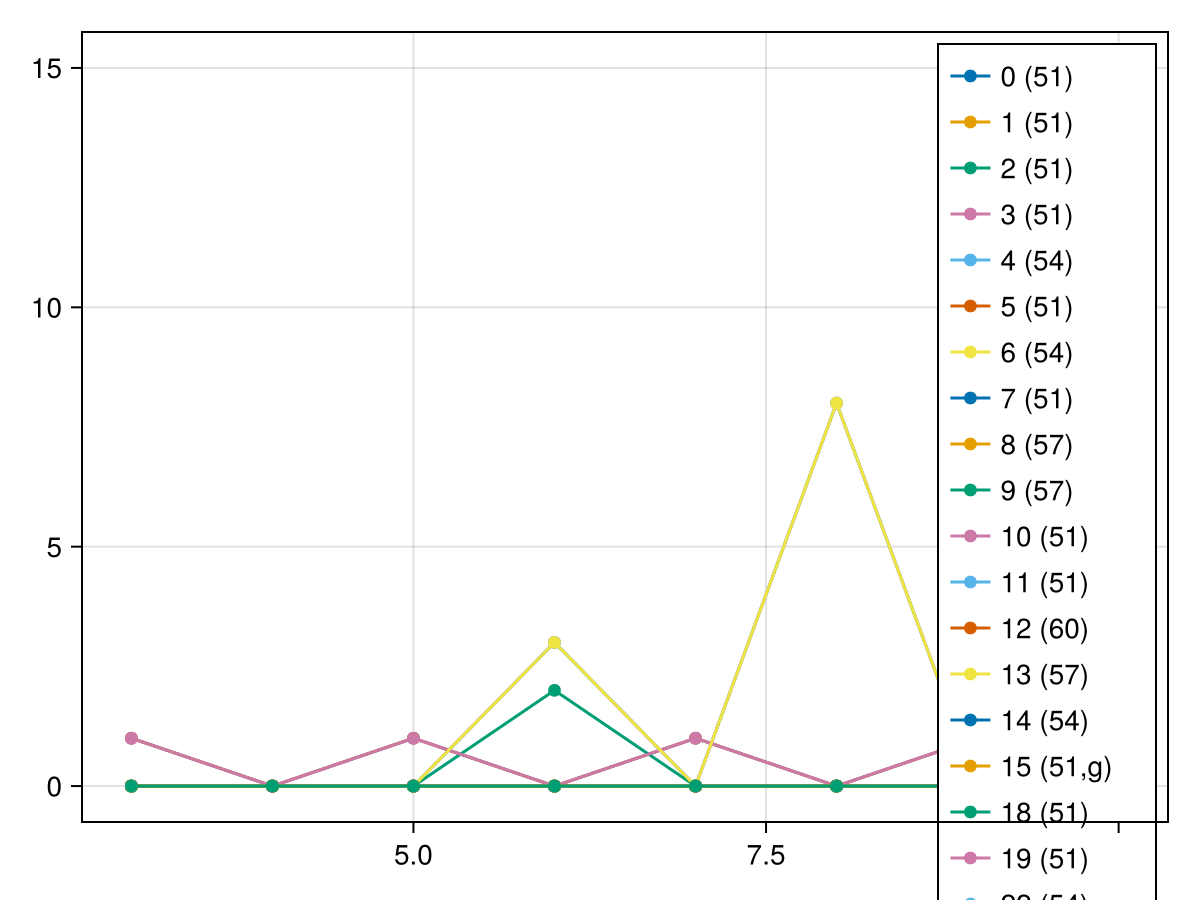

In [181]:
fig = Figure()
ax = Axis(fig[1,1])
for gdf in groupby(sdf, :code)
    code = gdf.code[1]
    scatterlines!(ax, gdf.N, gdf.Neqcyc; label=full_code_label(code; short=true))
end
axislegend(ax)
fig

In [193]:
display(GLMakie.Screen(), fap)

GLMakie.Screen(...)